# **Game Data Analysis**

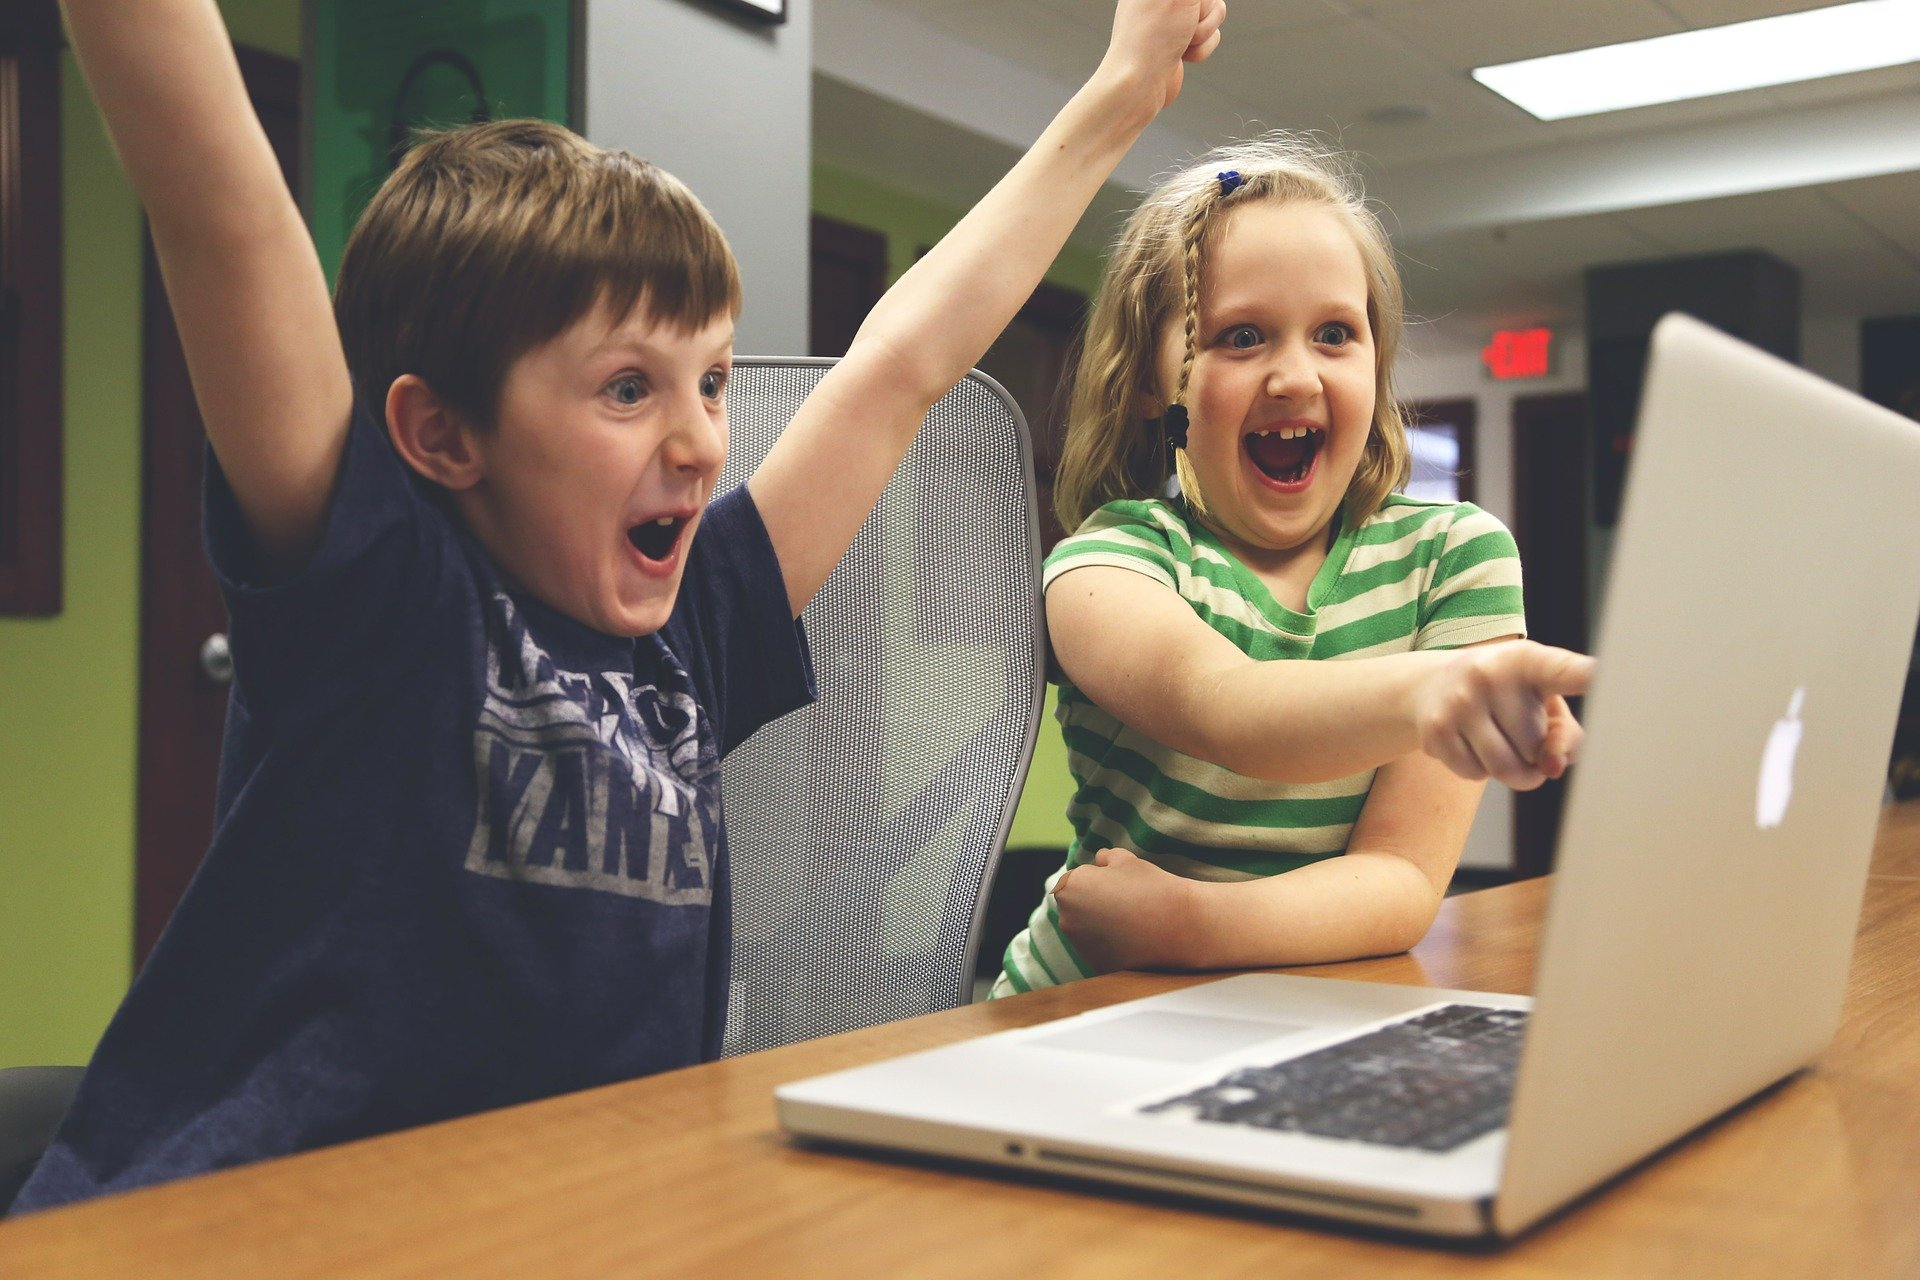

2020년 세계 게임 시장 규모는 전년 대비 9.3% 성장한 1593억 달러(193조원)로 전망되는 등 Game 시장은 점진적으로 성장하고 있습니다.

이번 분석은, **Game 시장을 예측함으로써, 게임 회사에 BI를 제공할 데이터 분석** 작업을 진행해보도록 하겠습니다. 


* **Analysis 1. Whether The Preferred Game Genre Differs By Region**
* **Analysis 2. Trend Analysis**
* **Analysis 3. Finding High-Sales Games (Groupby)**

In [ ]:
# Import the required library

import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats
import scipy
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from google.colab import files

In [ ]:
# file upload
uploaded = files.upload()

Saving vgames2 (1).csv to vgames2 (1).csv


In [ ]:
# Dataframe upload, information check

df=pd.read_csv(io.BytesIO(uploaded['vgames2 (1).csv']))
print(df.info())
print('\n',df.dtypes,'\n')
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB
None

 Unnamed: 0       int64
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object 



,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0


In [ ]:
# data preprocessing (1) : Remove unnecessary column
df.drop('Unnamed: 0',inplace=True, axis=1)

In [ ]:
# data preprocessing (2) : Replace outliers to NULL values
# There is no outlier except for 'Year' and '~_Sales' of K and M.

for i in df.columns :
  print(df[i].unique())

["Candace Kane's Candy Factory" 'The Munchables'
 'Otome wa Oanesama Boku ni Koi Shiteru Portable' ...
 'White Album: Tsuzurareru Fuyu no Omoide' 'Minna no Chizu 2'
 'Rainbow Islands: Revolution']
['DS' 'Wii' 'PSP' 'PS3' 'PC' 'PS' 'GBA' 'PS4' 'PS2' 'XB' 'X360' 'GC' '3DS'
 '2600' 'SAT' 'GB' 'NES' 'DC' 'N64' 'XOne' 'SNES' 'WiiU' 'PSV' 'GEN' 'SCD'
 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2.008e+03 2.009e+03 2.010e+03 2.005e+03 2.011e+03 2.007e+03 2.001e+03
 2.003e+03 2.006e+03 2.014e+03 2.015e+03 2.002e+03 1.997e+03 2.013e+03
 1.996e+03 2.004e+03 2.000e+03       nan 1.984e+03 1.998e+03 2.016e+03
 1.985e+03 1.999e+03 9.000e+00 9.700e+01 1.995e+03 1.993e+03 2.012e+03
 1.987e+03 1.982e+03 1.100e+01 1.994e+03 1.990e+03 1.500e+01 1.992e+03
 1.991e+03 1.983e+03 1.988e+03 1.981e+03 3.000e+00 1.989e+03 9.600e+01
 6.000e+00 8.000e+00 1.986e+03 1.000e+00 5.000e+00 4.000e+00 1.000e+01
 9.800e+01 7.000e+00 1.600e+01 8.600e+01 1.400e+01 9.500e+01 2.017e+03
 1.980e+03 2.020e+03 2.000e+00 1.300e+01 0.000e+

In [ ]:
# data preprocessing (3) : Remove outliers 1. make def replacing K and M into numeric
def make_number(a):
  K_to_num = pd.to_numeric(df[df[a].str.contains('K')][a].str.split('K').str[0])*1000
  df.loc[K_to_num.index,a]=K_to_num.astype('string')
  M_to_num = pd.to_numeric(df[df[a].str.contains('M')][a].str.split('M').str[0])*1000000
  df.loc[M_to_num.index,a]=M_to_num.astype('string')
  df[a]=pd.to_numeric(df[a])

# apply def
make_number('JP_Sales')
make_number('NA_Sales')
make_number('EU_Sales')
make_number('Other_Sales')

In [ ]:
# data preprocessing (4) : Remove outliers 2. Set the all number of digits in the 'Year' to 4 digits
df['Year'] = df['Year'].apply(lambda x : pd.to_numeric('200'+str(x)) if x>=0 and x<=9 else (pd.to_numeric('20'+str(x)) if x>=1  and x<=20 else (pd.to_numeric('19'+str(x)) if x>=50 and x<=98 else (x))))
df['Year'].unique()

array([2008., 2009., 2010., 2005., 2011., 2007., 2001., 2003., 2006.,
       2014., 2015., 2002., 1997., 2013., 1996., 2004., 2000.,   nan,
       1984., 1998., 2016., 1985., 1999., 1995., 1993., 2012., 1987.,
       1982., 1994., 1990., 1992., 1991., 1983., 1988., 1981., 1989.,
       1986., 2017., 1980., 2020.])

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
#  data preprocessing (5) : Genre, Publisher, Year : Its missing value is less than 10% of the total -> Remove
data_set = ['Genre','Publisher','Year']

for i in data_set:
  df.dropna(subset=[i], inplace=True)
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64